In [27]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import cv2

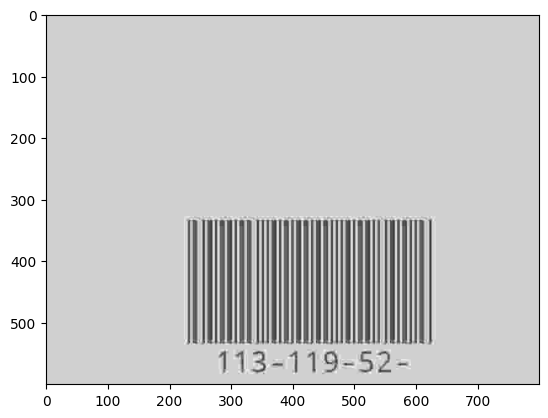

In [11]:
# Load the uploaded image
input_path = "testcases/08 - compresso espresso.jpg"
image = Image.open(input_path)
plt.imshow(image)

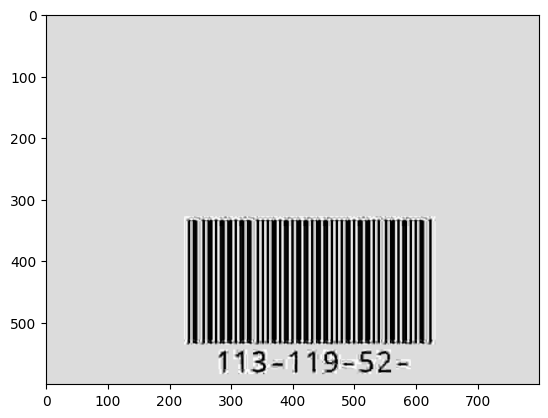

In [12]:
# Step 1: Enhance contrast
enhancer = ImageEnhance.Contrast(image)
enhanced_image = enhancer.enhance(2)  # Increase contrast

plt.imshow(enhanced_image)

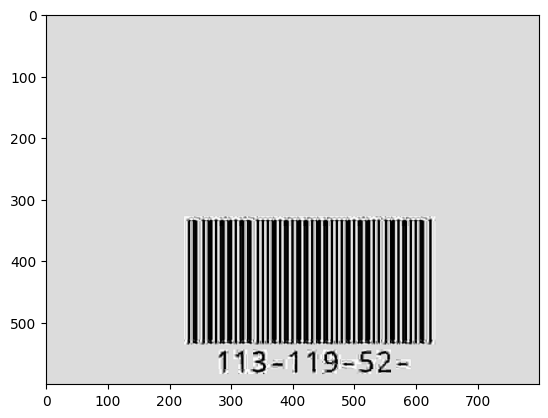

In [13]:
# Step 2: Sharpen the image
sharp_enhancer = ImageEnhance.Sharpness(enhanced_image)
sharpened_image = sharp_enhancer.enhance(2)  # Increase sharpness

plt.imshow(sharpened_image)

In [14]:
# Step 3: Resize (scale up) to improve readability
scaled_image = sharpened_image.resize((sharpened_image.width * 2, sharpened_image.height * 2))


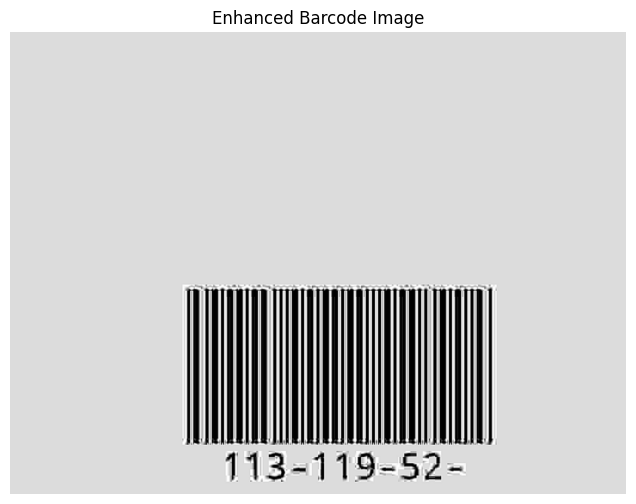

In [15]:
# Display the processed image
plt.figure(figsize=(10, 6))
plt.imshow(scaled_image, cmap='gray')
plt.axis('off')
plt.title("Enhanced Barcode Image")
plt.show()

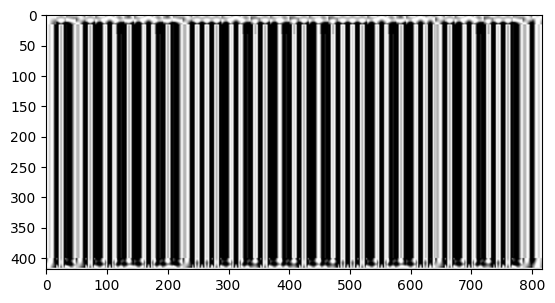

In [29]:
np_scaled_image = np.array(scaled_image)

def cropped_image(image):
  # Use Canny edge detection
    edges = cv2.Canny(image, 50, 150)
    # Detect vertical lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=197, maxLineGap=10)
    min_x, max_x, min_y, max_y = float('inf'), -float('inf'), float('inf'), -float('inf')

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Vertical lines: x1 == x2 or nearly vertical
            if abs(x1 - x2) < 10:
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)
            elif abs(y1 - y2) < 10:  # Horizontal lines
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)

    if min_x != float('inf') and max_x != -float('inf') and min_y != float('inf') and max_y != -float('inf'):
        return image[min_y:max_y, min_x:max_x]
cropped_image = cropped_image(np_scaled_image)
plt.imshow(cropped_image, cmap='gray')

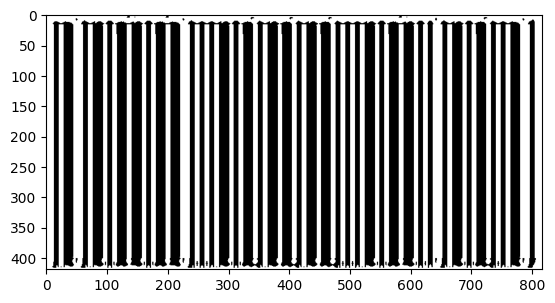

In [30]:
np_image = np.array(cropped_image)

_, binary_image = cv2.threshold(np_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')